# Assignment 1-1: K-Nearest Neighbors (k-NN)

In this notebook you will implement a K-Nearest Neighbors classifier on the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).

Recall that the K-Nearest Neighbor classifier does the following:
- During training, the classifier simply memorizes the training data
- During testing, test images are compared to each training image; the predicted label is the majority vote among the K nearest training examples.

After implementing the K-Nearest Neighbor classifier, you will use *cross-validation* to find the best value of K.

The goals of this exercise are to go through a simple example of the data-driven image classification pipeline, and also to practice writing efficient, vectorized code in [PyTorch](https://pytorch.org/).

## Downloading the CIFAR-10 dataset 

In [202]:
import numpy as np
import matplotlib.pyplot as plt
import data_utils
import download

In [203]:
url = "https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz"
download_dir = "./data"
download.maybe_download_and_extract(url,download_dir)

Data has apparently already been downloaded and unpacked.


## Loading raw files and reading them as training and testing datasets

In [204]:
cifar10_dir = './data/cifar-10-batches-py'
X_train, y_train, X_test, y_test = data_utils.load_CIFAR10(cifar10_dir)

# Checking the size of the training and testing data
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


## Visualizing dataset samples
To give you a sense of the nature of the images in CIFAR-10, this cell visualizes some random examples from the training set.

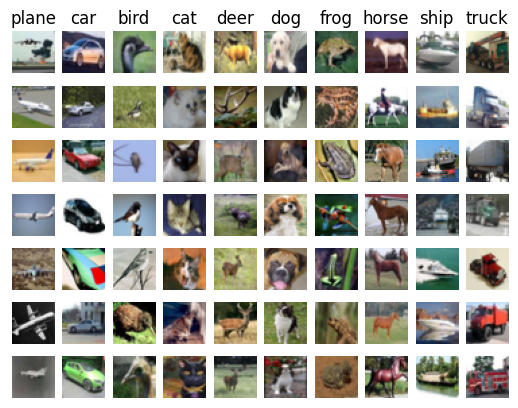

In [205]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## Subsample the dataset
When implementing machine learning algorithms, it's usually a good idea to use a small sample of the full dataset. This way your code will run much faster, allowing for more interactive and efficient development. Once you are satisfied that you have correctly implemented the algorithm, you can then rerun with the entire dataset.

We will subsample the data to use only 500 training examples and 250 test examples:

In [206]:
# Memory error prevention by subsampling data

num_training = 500
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 250
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [207]:
# reshaping data and placing into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(500, 3072) (250, 3072)


# K-Nearest Neighbors (k-NN)

Now that we have examined and prepared our data, it is time to implement the kNN classifier. We can break the process down into two steps:

1. Perform k-Nearest neighbours algorithm on the CiFAR-10 dataset to classify test images. 
2. Perform k-fold cross validation and plot the trend line with error bars that correspond to standard deviation to find the best value of the 'k' hyper parameter and best accuracy on the dataset.
3. Select the best value for k, and rerun the classifier on our full 5000 set of training examples.
4. Discussion: Discuss your understanding.

In [208]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**Implementing and Initialising k-NN using Euclidean**

In [209]:
knn_sklearn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

Train the classifier

In [210]:
knn_sklearn.fit(X_train, y_train)

print("k-NN classifier has been trained.")

k-NN classifier has been trained.


Make predictions on the test set

In [211]:
y_pred_sklearn = knn_sklearn.predict(X_test)

Generating Confusion matrix

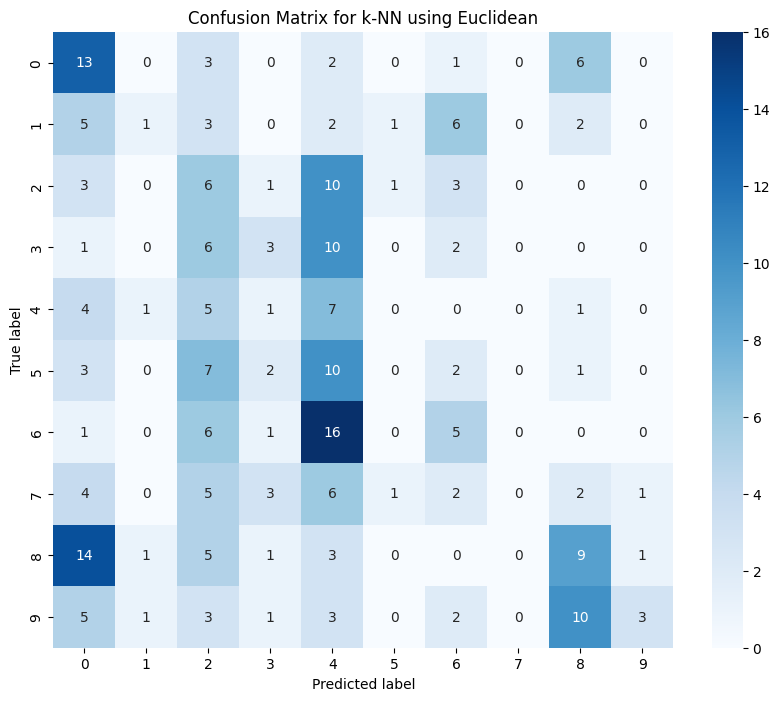

In [212]:
cm1 = confusion_matrix(y_test, y_pred_sklearn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k-NN using Euclidean')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Calculating Accuracy

In [213]:
accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f"Accuracy of k-NN classifier: {accuracy:.4f}")

Accuracy of k-NN classifier: 0.1880


Generate classification report

In [214]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("\
Classification Report:")
print(classification_report(y_test, y_pred_sklearn, target_names=class_names))
print(f"Accuracy with Euclidean distance: {accuracy:.4f}")

Classification Report:
              precision    recall  f1-score   support

    airplane       0.25      0.52      0.33        25
  automobile       0.25      0.05      0.08        20
        bird       0.12      0.25      0.16        24
         cat       0.23      0.14      0.17        22
        deer       0.10      0.37      0.16        19
         dog       0.00      0.00      0.00        25
        frog       0.22      0.17      0.19        29
       horse       0.00      0.00      0.00        24
        ship       0.29      0.26      0.28        34
       truck       0.60      0.11      0.18        28

    accuracy                           0.19       250
   macro avg       0.21      0.19      0.16       250
weighted avg       0.22      0.19      0.16       250

Accuracy with Euclidean distance: 0.1880


C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Initialize the k-NN classifier with k=5 and Manhattan distance**

In [215]:
knn_manhattan = KNeighborsClassifier(n_neighbors=5, metric='manhattan')

# Train the classifier
knn_manhattan.fit(X_train, y_train)

print("k-NN classifier using Manhattan distance has been trained.")

k-NN classifier using Manhattan distance has been trained.


Make predictions on the test set

In [216]:
y_pred_manhattan = knn_manhattan.predict(X_test)

Calculating accuracy

In [217]:
accuracy = accuracy_score(y_test, y_pred_manhattan)
print(f"Accuracy of k-NN classifier with Manhattan distance: {accuracy:.4f}")

Accuracy of k-NN classifier with Manhattan distance: 0.2040


Generating Classification report

In [218]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print("\
Classification Report:")
print(classification_report(y_test, y_pred_manhattan, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.26      0.56      0.35        25
  automobile       0.08      0.05      0.06        20
        bird       0.22      0.33      0.27        24
         cat       0.08      0.05      0.06        22
        deer       0.08      0.26      0.12        19
         dog       0.33      0.08      0.13        25
        frog       0.24      0.14      0.17        29
       horse       0.17      0.04      0.07        24
        ship       0.34      0.29      0.32        34
       truck       0.38      0.18      0.24        28

    accuracy                           0.20       250
   macro avg       0.22      0.20      0.18       250
weighted avg       0.23      0.20      0.19       250



Generate confusion matrix

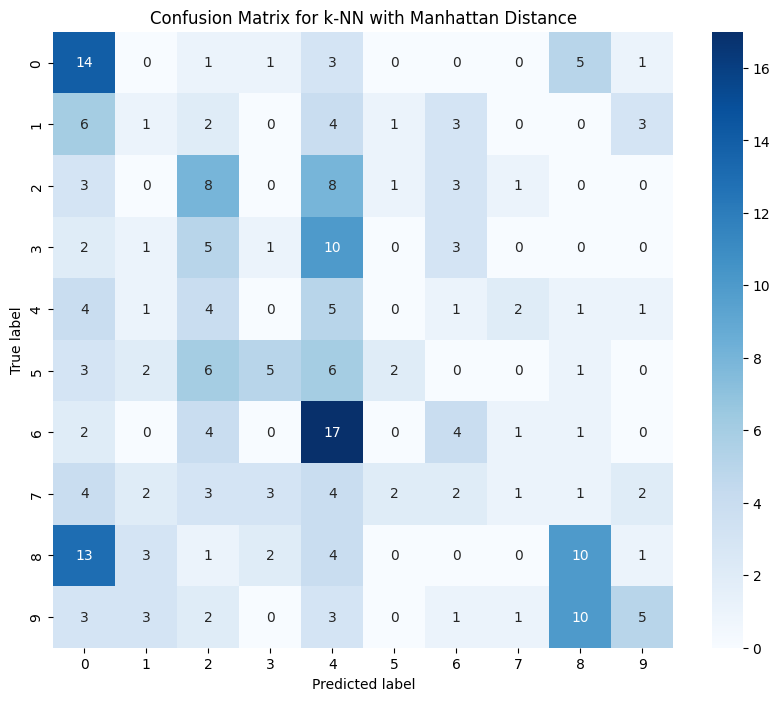

Accuracy with Manhattan distance: 0.2040


In [219]:
cm2 = confusion_matrix(y_test, y_pred_manhattan)
plt.figure(figsize=(10, 8))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k-NN with Manhattan Distance')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

print(f"Accuracy with Manhattan distance: {accuracy:.4f}")

**Initialize the k-NN classifier with k=5 and Minkowski distance**

In [220]:
knn_minkowski = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=3)

# Train the classifier
knn_minkowski.fit(X_train, y_train)

print("k-NN classifier using Minkowski distance has been trained.")

k-NN classifier using Minkowski distance has been trained.


Making predictions on the test set 

In [221]:
y_pred_minkowski = knn_minkowski.predict(X_test)

Calculating accuracy

In [222]:
accuracy = accuracy_score(y_test, y_pred_minkowski)
print(f"Accuracy of k-NN classifier with Minkowski distance: {accuracy:.4f}")

Accuracy of k-NN classifier with Minkowski distance: 0.1640


Generating classification report

In [223]:
print("\
Classification Report:")
print(classification_report(y_test, y_pred_minkowski, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

    airplane       0.22      0.44      0.29        25
  automobile       0.00      0.00      0.00        20
        bird       0.10      0.21      0.14        24
         cat       0.27      0.14      0.18        22
        deer       0.11      0.42      0.17        19
         dog       0.00      0.00      0.00        25
        frog       0.20      0.14      0.16        29
       horse       0.00      0.00      0.00        24
        ship       0.25      0.26      0.26        34
       truck       1.00      0.04      0.07        28

    accuracy                           0.16       250
   macro avg       0.21      0.16      0.13       250
weighted avg       0.23      0.16      0.13       250



C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pc\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Generating Confusion matrix

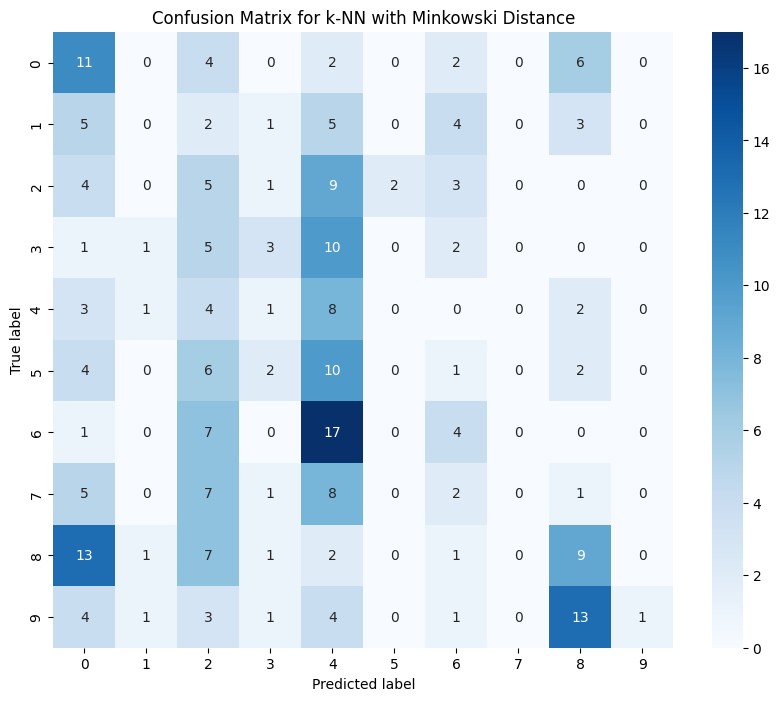

In [224]:
cm3 = confusion_matrix(y_test, y_pred_minkowski)
plt.figure(figsize=(10, 8))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for k-NN with Minkowski Distance')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Comparing results of all three distance methods

In [225]:
print("\
Comparison:")
print(f"Accuracy with Euclidean distance: {0.1880:.4f}")
print(f"Accuracy with Manhattan distance: {0.2040:.4f}")
print(f"Accuracy with Minkowski distance: {accuracy:.4f}")

Comparison:
Accuracy with Euclidean distance: 0.1880
Accuracy with Manhattan distance: 0.2040
Accuracy with Minkowski distance: 0.1640


Manhattan distance performed best among k-NN classifiers although the accuracy still considered as poor.
Steps for improving accuracies are:
implement CNN,implement regularisation, use batch normalization to stabilize training and potentially improve performance,
Fine-tune hyperparameters.